In [1]:
#This notebook loads the example Meteye precipitation forecast, plots it on a basemap and displays it in a dashboard

In [5]:
# get some modules
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
DailyPrecip50Pct_SFC = xr.open_dataset('/g/data/r78/rjd547/ozewex18/Data/IDN71015_NSW_DailyPrecip50Pct_SFC.nc')

In [7]:
print(DailyPrecip50Pct_SFC)

<xarray.Dataset>
Dimensions:               (latitude: 193, longitude: 232, time: 7)
Coordinates:
  * latitude              (latitude) float32 -37.61 -37.56 -37.51 -37.46 ...
  * longitude             (longitude) float32 140.903 140.963 141.022 ...
  * time                  (time) datetime64[ns] 2012-03-28T12:00:00 ...
Data variables:
    DailyPrecip50Pct_SFC  (time, latitude, longitude) float64 ...
Attributes:
    creationTime:        1332961242
    creationTimeString:  Wed Mar 28 19:00:42 2012
    Conventions:         COARDS


/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


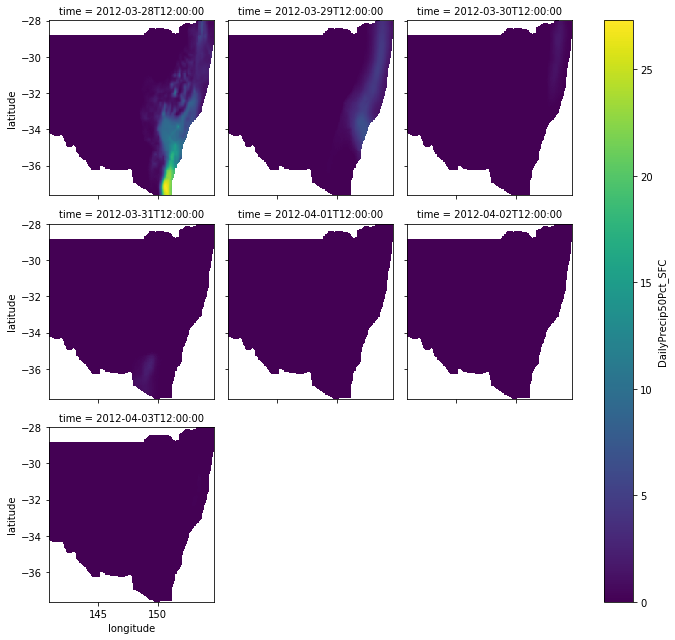

In [6]:
plt.clf()
DailyPrecip50Pct_SFC.DailyPrecip50Pct_SFC.plot(x='longitude', y='latitude', col='time', col_wrap=3)
#plt.savefig('/g/data/r78/rjd547/tmp/testplt.png')

In [10]:
DailyPrecip50Pct_SFC.attrs['crs']='EPSG:4326'

In [11]:
DailyPrecip50Pct_SFC.attrs['crs']

'EPSG:4326'

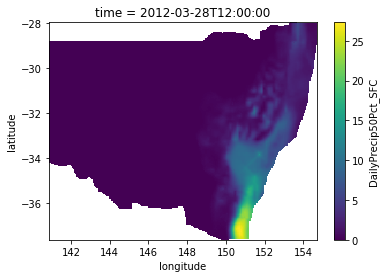

In [16]:
DailyPrecip50Pct_SFC.DailyPrecip50Pct_SFC.isel(time=0).plot()

In [17]:
import cartopy

In [19]:
shape_aus =cartopy.io.shapereader.Reader('/g/data/oe9/user/RODDS/Data/shapefiles/Australia_outlines/coast_250_poly1.shp')

In [21]:
shape_aus_outline = shape_aus.geometries

In [22]:
shape_aus_outline

<bound method Reader.geometries of <cartopy.io.shapereader.Reader object at 0x7fe8fae1bfd0>>

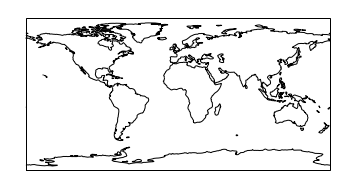

In [36]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [34]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

TypeError: Can't instantiate abstract class Projection with abstract methods boundary, threshold, x_limits, y_limits

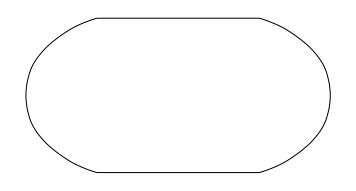

In [43]:
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature


fname = '/g/data/oe9/user/RODDS/Data/shapefiles/Australia_outlines/coast_250_poly1.shp'

ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature)
plt.show()

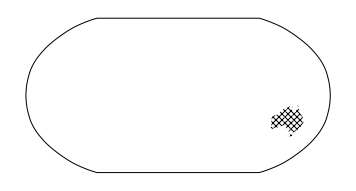

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

fname = '/g/data/oe9/user/RODDS/Data/shapefiles/Australia_outlines/coast_250_poly1.shp'

ax = plt.axes(projection=ccrs.Robinson())
ax.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  facecolor='white', hatch='xxxx')
plt.show()